# 특징추출

In [1]:
import librosa
import os,csv
from sklearn.preprocessing import StandardScaler

def read_file(read_file):
    return librosa.load(read_file)

# def std_fit(y):
#     std = StandardScaler()
#     std.fit(y.reshape(1,-1))
#     return std

# def std_transform(std,y):
#     return std.transform(y.reshape(1,-1))

def feature_extract_save(y,sr,save_file=None):
    
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = [np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr),np.mean(chroma_stft)]    
    for e in mfcc:
        to_append.append(np.mean(e))
    
    #파일생성체크 
    if save_file == None:
        pass
    else:
        # header
        if save_file == True:
            save_file = './voice_data.csv'
        header = ['spec_cent','spec_bw','rolloff','zcr','chroma_stft']
        for i in range(20):
            header.append(f'mfcc{i}')
        
        # 파일체크 후 생성
        if not os.path.exists(save_file):
            with open(save_file,'w',newline='') as f:
                writer = csv.writer(f)
                writer.writerow(header)

        with open(save_file, 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(to_append)
            
    return to_append

# init

In [2]:
dir = 'C:/Users/user/desktop/sound_data/air/'
file_list = os.listdir(dir)
file_std = dir+"asiana_default.mp3"
file1 = dir+file_list[0]
file2 = dir+file_list[2]

In [208]:
file_list

['1  .mp3', 'asiana_default.mp3', '승무원 보이스트레이닝으로 목소리 교정 수업 후.mp3']

# origin_voice.csv

In [4]:
import numpy as np

In [5]:
# origin_voice = './voice_origin.csv'
y,sr = read_file(file_std)
feature = feature_extract_save(y,sr)

C:\Users\User\Anaconda3\envs\pro\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [ ]:
y1,sr = read_file(file1)
feature1 = feature_extract_save(y1,sr)
y2,sr = read_file(file2)
feature2 = feature_extract_save(y2,sr)

### origin -> data

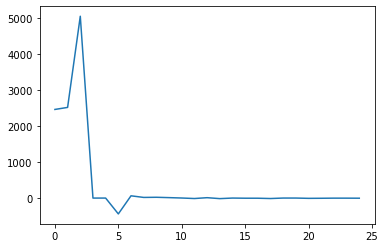

In [198]:
plt.plot(feature)

In [6]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

origin_voice = './voice_origin.csv'
df = pd.read_csv(origin_voice)

In [7]:
voice_data = './voice_data.csv'
df_data = pd.read_csv(voice_data)

In [8]:
std = StandardScaler()
df_std = std.fit_transform(df_data)

In [350]:
(df_std[0,:]-df_std[1,:]).mean()

0.6795329797686138

In [351]:
(df_std[0,:]-df_std[2,:]).mean()

0.25588927482088514

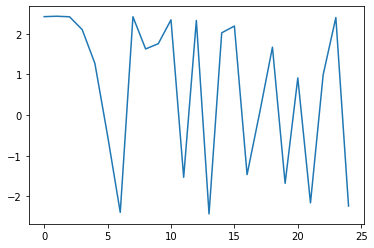

In [366]:
plt.plot(df_std[0,:]-df_std[1,:])

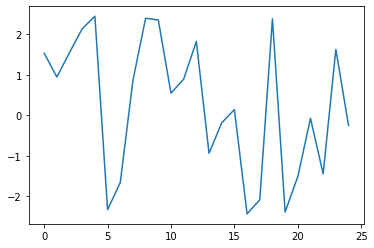

In [365]:
plt.plot(df_std[0,:]-df_std[2,:])


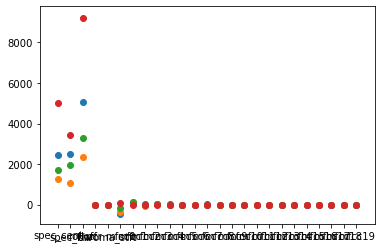

In [298]:
plt.scatter(header,feature)
plt.scatter(header,feature1)
plt.scatter(header,feature2)
plt.scatter(header,feature_rand)
plt.l

In [299]:
abs((np.array(feature)-np.array(feature_rand)).sum())

8116.651165671326

In [209]:
import random

In [288]:
y.shape

(1544256,)

In [290]:
y_rand = np.random.rand(y.shape[0])

In [297]:
feature_rand = feature_extract_save(y_rand,sr)

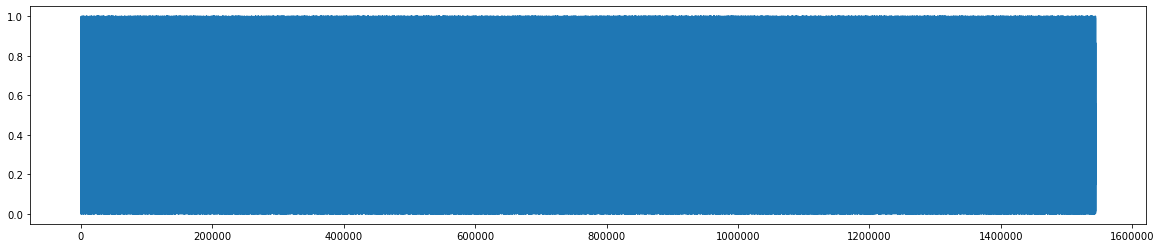

In [294]:
plt.figure(figsize=(20,4))
plt.plot(y_rand)

In [269]:
np.array([1,2])-np.array([1,3])

array([ 0, -1])